In [1]:
import sys
sys.path.append("../")

import torch

from tdoa.visualization import plot_mics_and_sources
from neural_tdoa.model import TdoaCrnn10
from neural_tdoa.utils.load_config import load_config
from datasets.dataset import TdoaDataset


def load_model():
    model = TdoaCrnn10()
    
    weights = torch.load("../tests/fixtures/weights.pth",
                         map_location=torch.device('cpu'))
    #breakpoint()
    model.load_state_dict(weights)
    model.eval()

    return model

def eval_model(model, x):
    with torch.no_grad():
        return model(x)

model = load_model()
config = load_config()
dataset = TdoaDataset(config["validation_dataset"], include_metadata=True)

100%|███████████████████████████████████████████████████████| 100/100 [00:01<00:00, 51.49it/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

output_dicts = []

def error(y_gt, y_pred):
    return np.sqrt((y_gt - y_pred)**2)
for sample in dataset:
    x = sample[0]
    prediction = float(eval_model(model, x["x"].unsqueeze(0)).numpy())
    gt = float(sample[1].numpy())
    error_val = error(gt, prediction)
    print(f"ground_truth: {gt} prediction: {prediction}, error: {error_val}")
    
    x["prediction"] = prediction
    x["gt"] = sample[1]
    x["error"] = error_val
    output_dicts.append(x)
    
#     room_dims = eval(sample[0]["room_dims"])
#     mics = eval(sample[0]["mic_coordinates"])
#     sources = [eval(sample[0]["source_coordinates"])]
#     plot_mics_and_sources(room_dims, mics, sources)
#     plt.show()

ground_truth: 0.0017075061332434416 prediction: 0.10961893945932388, error: 0.10791143332608044
ground_truth: 0.999791145324707 prediction: 0.913202702999115, error: 0.08658844232559204
ground_truth: 0.9920032024383545 prediction: 0.8786344528198242, error: 0.11336874961853027
ground_truth: 0.5464069843292236 prediction: 0.8989977240562439, error: 0.35259073972702026
ground_truth: 0.0008016538340598345 prediction: 0.1910707652568817, error: 0.19026911142282188
ground_truth: 0.05718281492590904 prediction: 0.1126503199338913, error: 0.055467505007982254
ground_truth: 0.9267383217811584 prediction: 0.9130865931510925, error: 0.013651728630065918
ground_truth: 0.6767757534980774 prediction: 0.8309509754180908, error: 0.15417522192001343
ground_truth: 0.8730537295341492 prediction: 0.9131585955619812, error: 0.04010486602783203
ground_truth: 0.10181677341461182 prediction: 0.2947196066379547, error: 0.1929028332233429
ground_truth: 0.8644108772277832 prediction: 0.9129881262779236, error: 

ground_truth: 0.2789987325668335 prediction: 0.13065306842327118, error: 0.14834566414356232
ground_truth: 0.3979925513267517 prediction: 0.24063055217266083, error: 0.15736199915409088
ground_truth: 0.5578957796096802 prediction: 0.8138208389282227, error: 0.2559250593185425
ground_truth: 0.6729913353919983 prediction: 0.8579537272453308, error: 0.18496239185333252
ground_truth: 0.9953610897064209 prediction: 0.9130499362945557, error: 0.08231115341186523
ground_truth: 0.586915135383606 prediction: 0.8706472516059875, error: 0.2837321162223816
ground_truth: 0.5532430410385132 prediction: 0.6817306280136108, error: 0.12848758697509766
ground_truth: 0.5054816007614136 prediction: 0.3250935971736908, error: 0.18038800358772278
ground_truth: 0.3611711263656616 prediction: 0.4726075530052185, error: 0.11143642663955688
ground_truth: 0.4400328993797302 prediction: 0.576393723487854, error: 0.13636082410812378
ground_truth: 0.9275631308555603 prediction: 0.9123458862304688, error: 0.01521724

In [3]:
output_dicts.sort(key=lambda x: x["error"], reverse=True)

Error mean: 0.12981561331684588 Error std: 0.10369774156055034
Error: 0.5709127560257912, delay: 0.39428164695813117


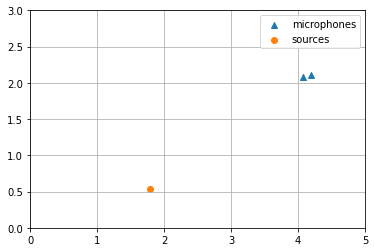

Error: 0.5258637992665172, delay: 1.6588674428161143


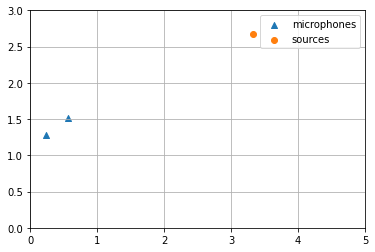

Error: 0.37190984189510345, delay: 6.674046756454178


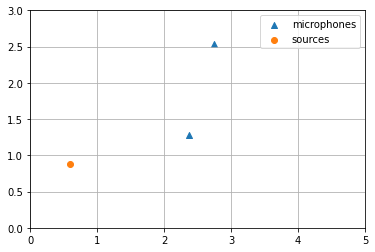

Error: 0.3644956648349762, delay: 7.536720433065435


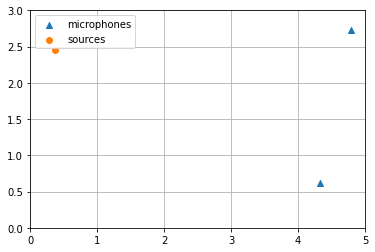

Error: 0.3541666865348816, delay: 3.2538545828356034


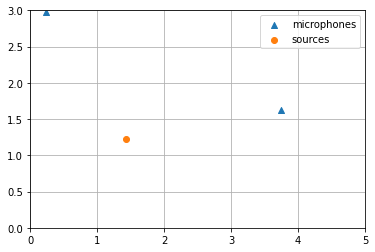

Error: 0.35259073972702026, delay: 7.902881305699072


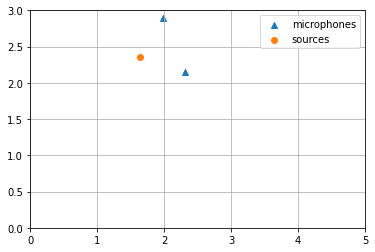

Error: 0.2837321162223816, delay: 9.409643886268164


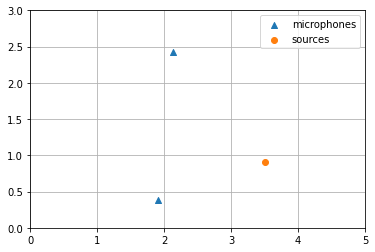

Error: 0.2686030864715576, delay: 4.8772696189652


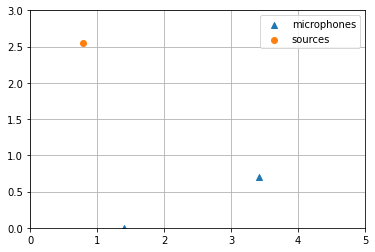

Error: 0.2645557224750519, delay: 7.375053588657515


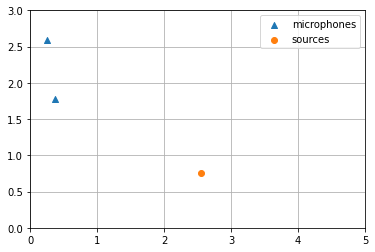

Error: 0.2559250593185425, delay: 9.459683066299196


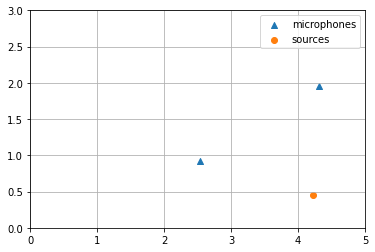

Error: 0.2482050061225891, delay: 4.874284377733234


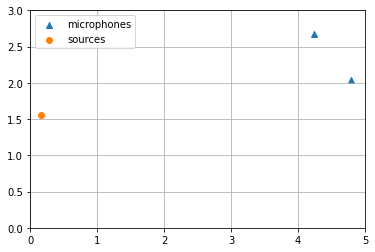

Error: 0.23634690791368484, delay: 9.548909985448997


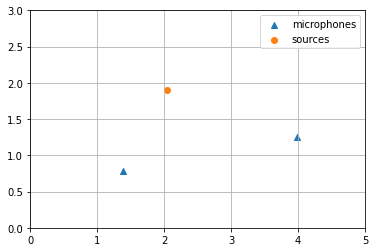

Error: 0.23108512163162231, delay: 1.2128756152163356


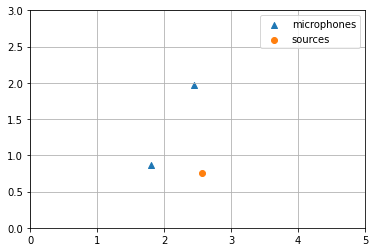

Error: 0.23036063462495804, delay: 7.408156937108567


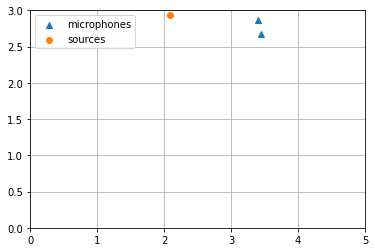

Error: 0.22913473844528198, delay: 0.24602061950101284


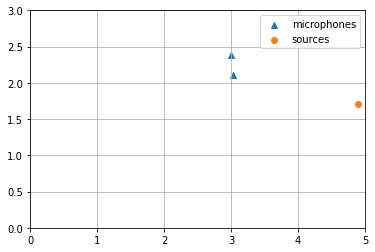

Error: 0.22132378816604614, delay: 1.6052096687675532


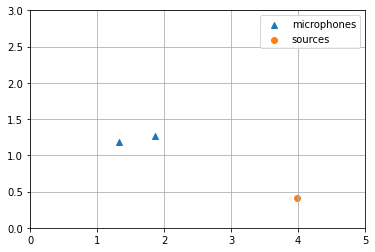

Error: 0.21793413162231445, delay: 6.108539678733086


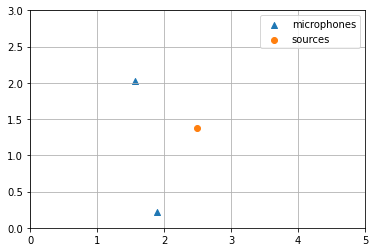

Error: 0.20343422889709473, delay: 3.2544231908333767


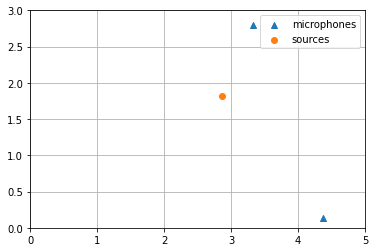

Error: 0.20262861251831055, delay: 2.2862641775220482


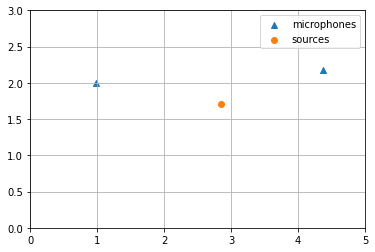

Error: 0.1929028332233429, delay: 7.216770952628236


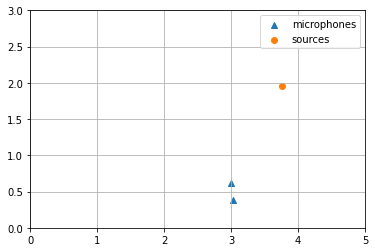

Error: 0.1926240622997284, delay: 9.559896824183612


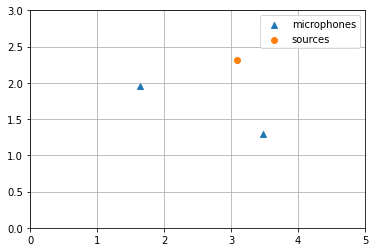

Error: 0.19026911142282188, delay: 8.970447974362594


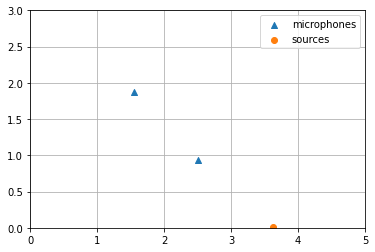

Error: 0.18532414734363556, delay: 5.698753445320603


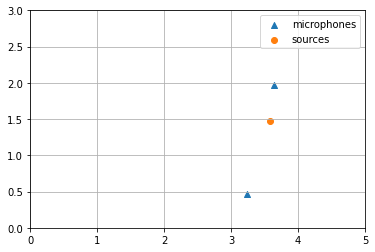

Error: 0.1852356195449829, delay: 9.837624699582365


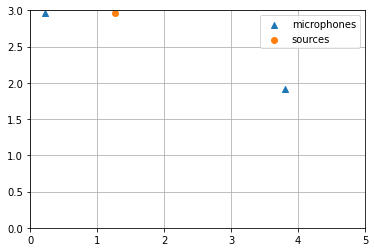

Error: 0.18496239185333252, delay: 2.0229135442984783


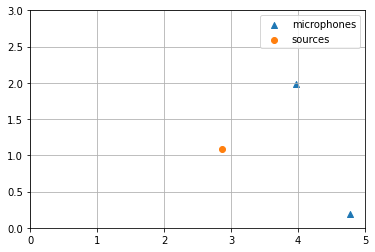

Error: 0.18038800358772278, delay: 8.432888112077006


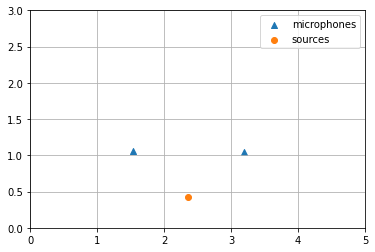

Error: 0.17634138464927673, delay: 3.3341569603417343


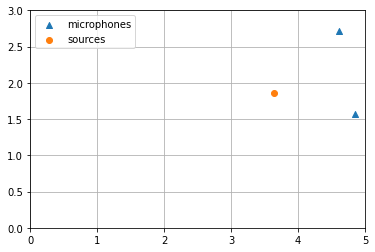

Error: 0.16817879676818848, delay: 7.706893389287165


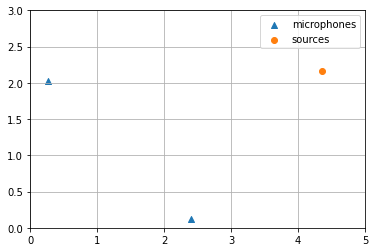

Error: 0.16204574704170227, delay: 0.5203474783655959


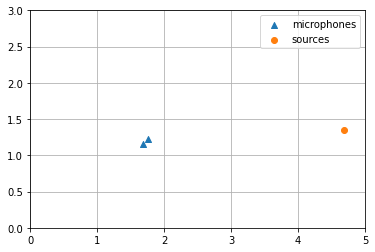

Error: 0.16012418270111084, delay: 0.8174138495704819


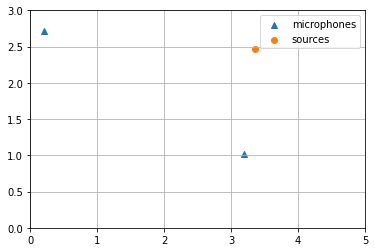

Error: 0.15770471096038818, delay: 9.117327461366688


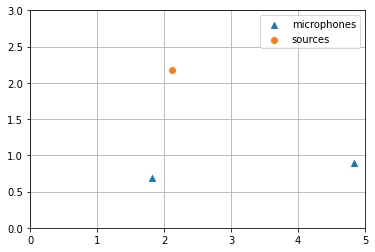

Error: 0.15736199915409088, delay: 5.804812741423015


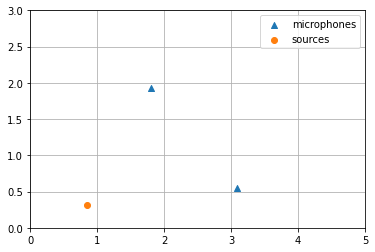

Error: 0.1562309383880347, delay: 2.6512969632756125


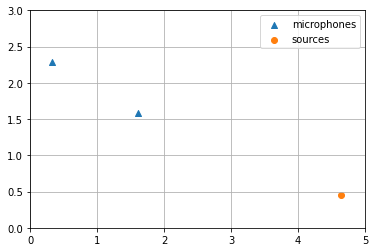

Error: 0.15417522192001343, delay: 6.059737280587164


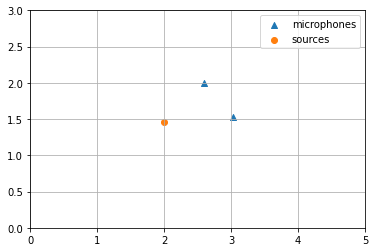

Error: 0.1504068225622177, delay: 5.9940500712196325


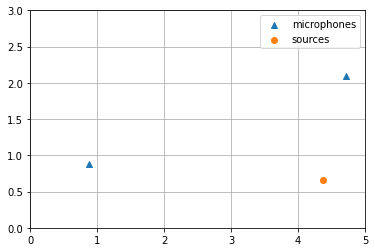

Error: 0.14834566414356232, delay: 2.48595435089239


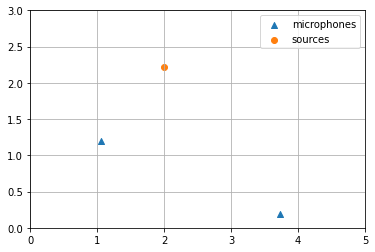

Error: 0.13636082410812378, delay: 5.144991095025936


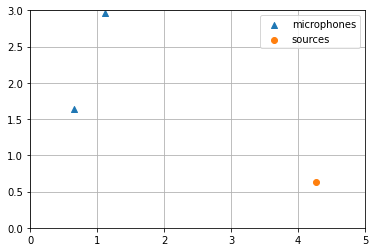

Error: 0.12848758697509766, delay: 0.6802637039670412


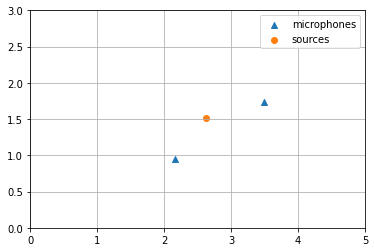

Error: 0.12827447056770325, delay: 3.044859980049864


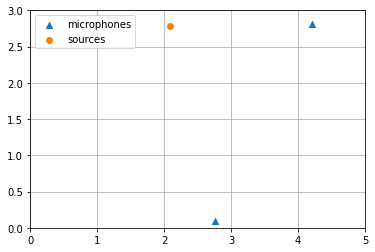

Error: 0.12707561254501343, delay: 8.66955316595226


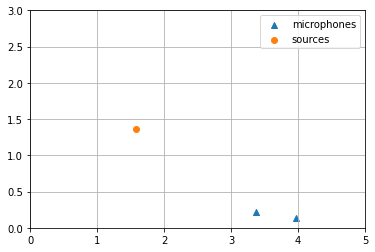

Error: 0.12436121702194214, delay: 2.0848389850478077


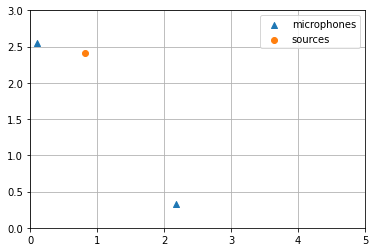

Error: 0.12180602550506592, delay: 3.0288943127066084


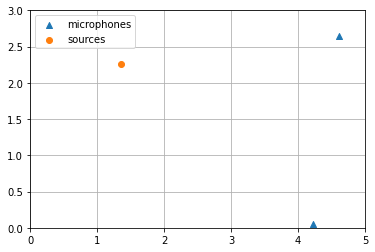

Error: 0.11571256816387177, delay: 7.446157438633824


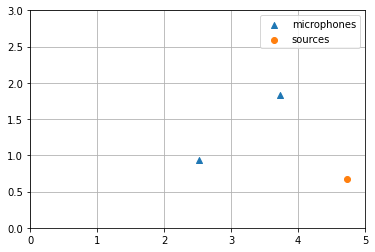

Error: 0.11341194808483124, delay: 1.9794405067329588


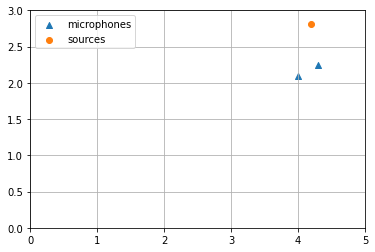

Error: 0.11336874961853027, delay: 1.3611885267602786


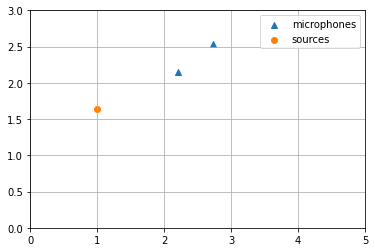

Error: 0.11262786388397217, delay: 0.922162748077594


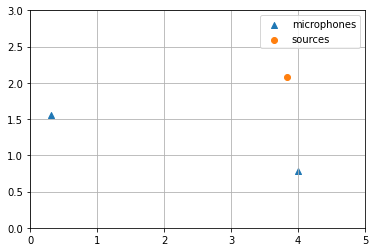

Error: 0.11143642663955688, delay: 1.5676894327062774


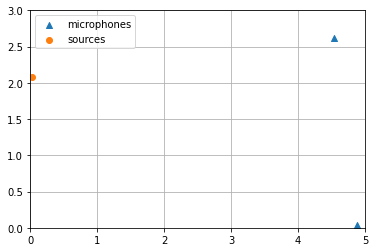

Error: 0.11009503468312687, delay: 0.047888822966739575


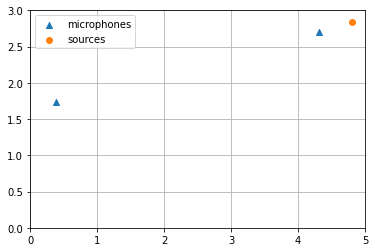

Error: 0.10791143332608044, delay: 7.0954641162412155


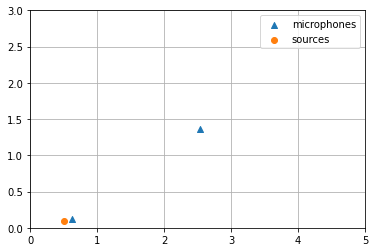

Error: 0.10552844405174255, delay: 0.8881047786983931


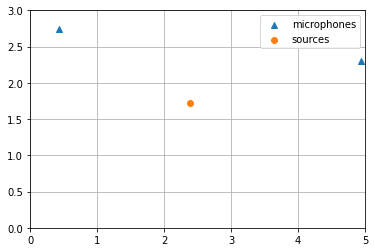

Error: 0.10441446304321289, delay: 8.386082538559949


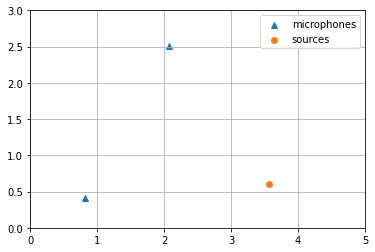

Error: 0.10433153621852398, delay: 4.993497144419256


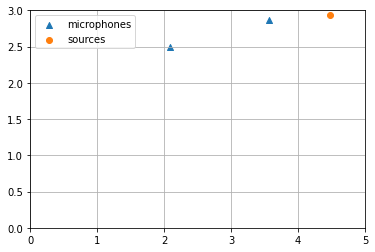

Error: 0.10283237788826227, delay: 4.675587664092548


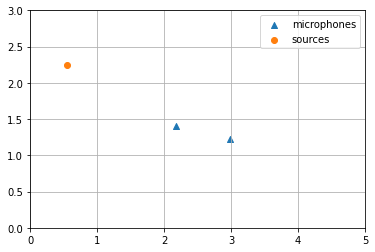

Error: 0.1010157866840018, delay: 4.585080074111847


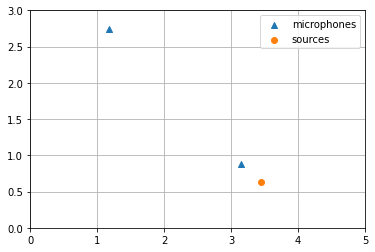

Error: 0.09569533867761493, delay: 0.0792819379009091


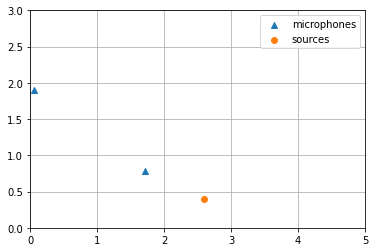

Error: 0.09142931550741196, delay: 1.3886765163404524


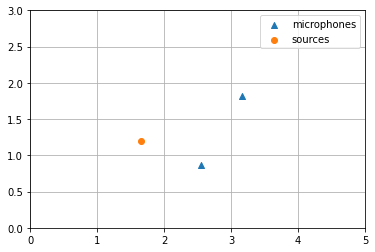

Error: 0.08659178018569946, delay: 1.0401058768158356


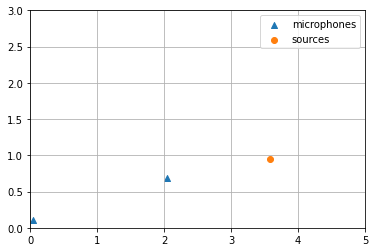

Error: 0.08658844232559204, delay: 2.7386912043436196


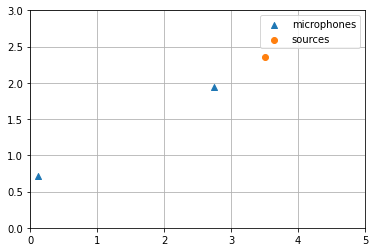

Error: 0.08569753170013428, delay: 3.803801977125576


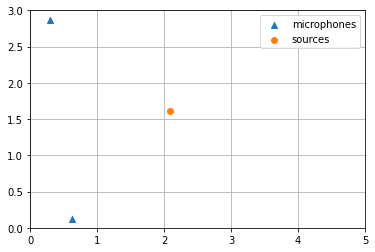

Error: 0.08356714248657227, delay: 2.3465679330044296


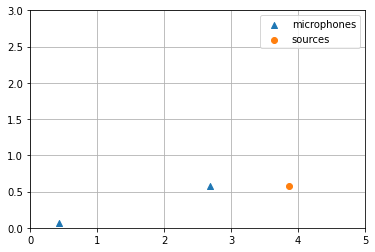

Error: 0.08231115341186523, delay: 3.8307376386137193


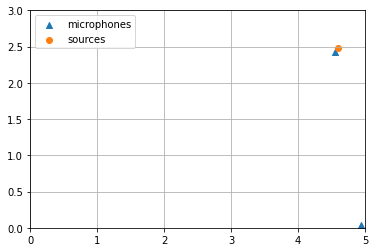

Error: 0.07983213663101196, delay: 3.3495898324479265


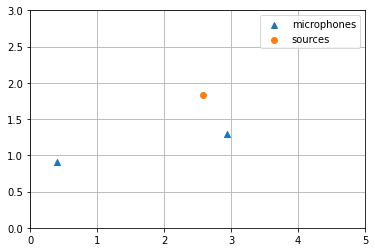

Error: 0.07936948537826538, delay: 7.011045351414134


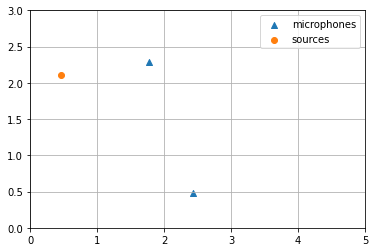

Error: 0.07912814617156982, delay: 1.3691148601687597


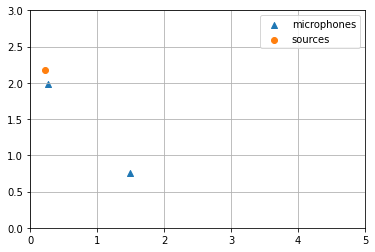

Error: 0.07710903882980347, delay: 2.1031219733700435


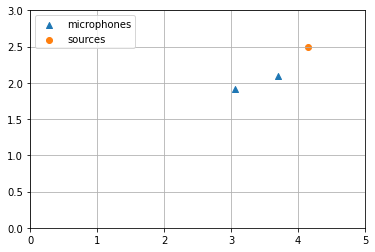

Error: 0.075923390686512, delay: 6.572980032205267


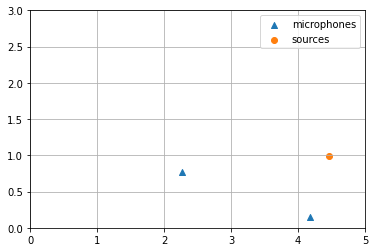

Error: 0.0755290687084198, delay: 9.642198040175241


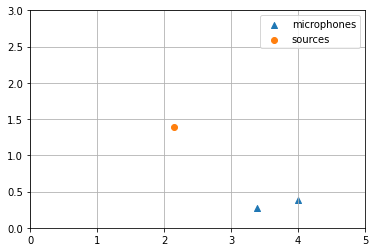

Error: 0.06837663054466248, delay: 3.026953721612795


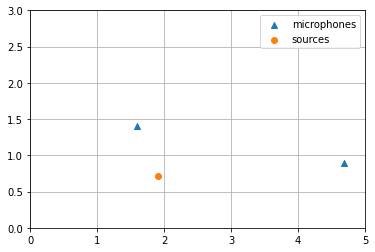

Error: 0.06795718520879745, delay: 3.657385778671399


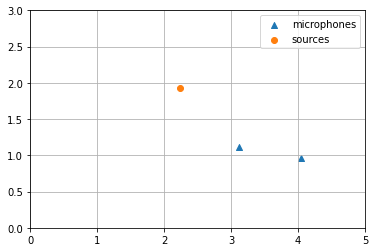

Error: 0.06789195537567139, delay: 0.7545896879852132


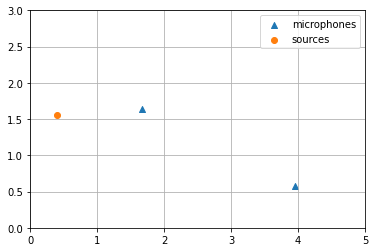

Error: 0.06499457359313965, delay: 0.7002664034001083


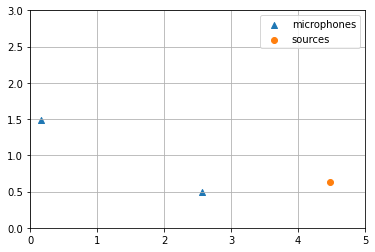

Error: 0.061251699924468994, delay: 5.563509890103546


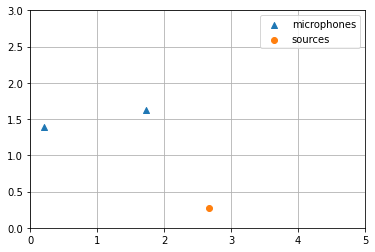

Error: 0.059398531913757324, delay: 1.6249623360320742


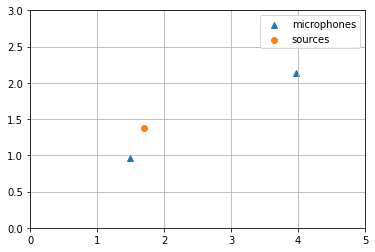

Error: 0.05832409858703613, delay: 4.762000689730757


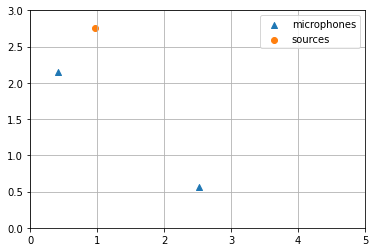

Error: 0.056216850876808167, delay: 4.031191753413831


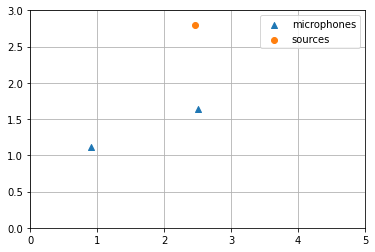

Error: 0.055467505007982254, delay: 2.481157894469609


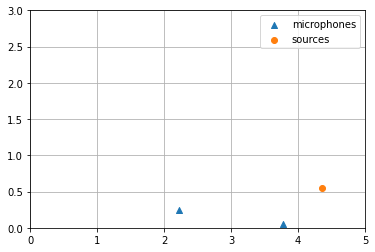

Error: 0.055088043212890625, delay: 0.5289995898193423


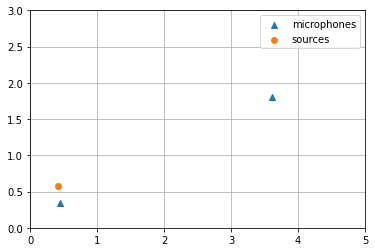

Error: 0.052897870540618896, delay: 7.478794546548315


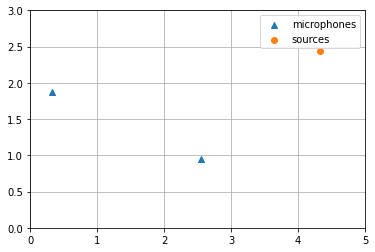

Error: 0.05210769176483154, delay: 7.09552385256309


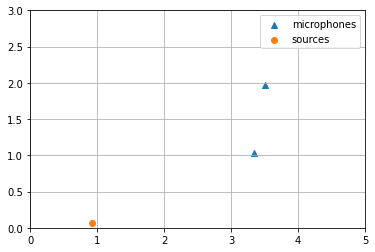

Error: 0.04857724905014038, delay: 1.1691836070281925


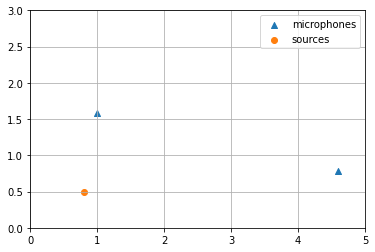

Error: 0.0475512333214283, delay: 6.1304593696835035


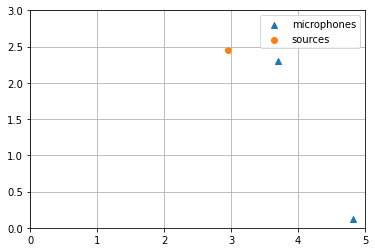

Error: 0.046879686415195465, delay: 4.614618529804955


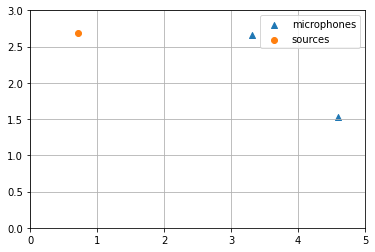

Error: 0.04390600323677063, delay: 5.821777847818987


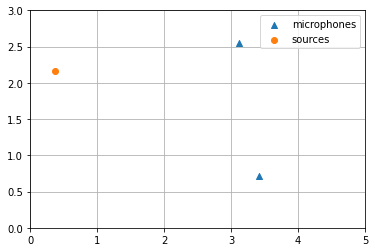

Error: 0.04010486602783203, delay: 4.289330983016883


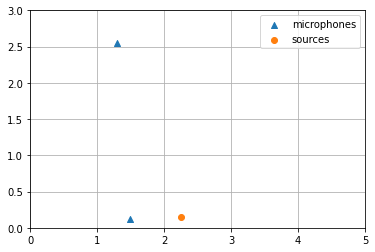

Error: 0.039097048342227936, delay: 3.069113715301061


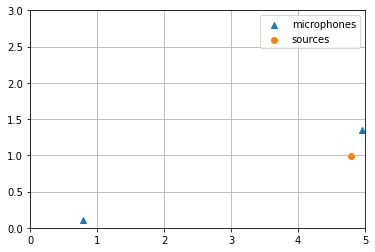

Error: 0.03867959976196289, delay: 6.388694518611922


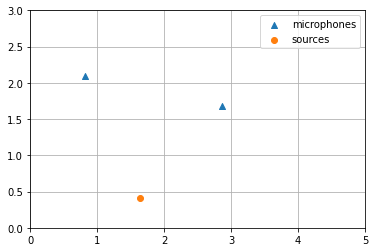

Error: 0.03848233073949814, delay: 9.422733094845354


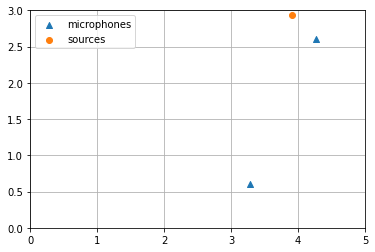

Error: 0.038030222058296204, delay: 8.95638565309357


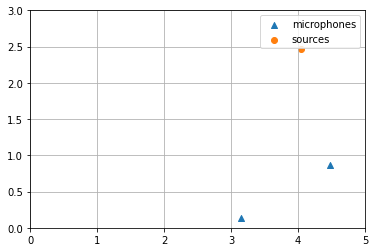

Error: 0.036134958267211914, delay: 9.713648101249401


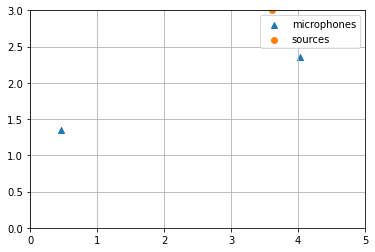

Error: 0.03428608179092407, delay: 6.666542301369107


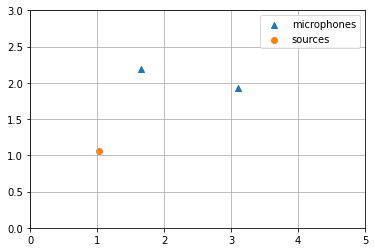

Error: 0.02007448673248291, delay: 7.649901250702374


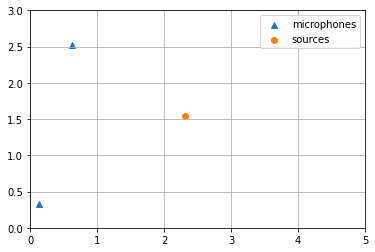

Error: 0.017435908317565918, delay: 6.516526422586118


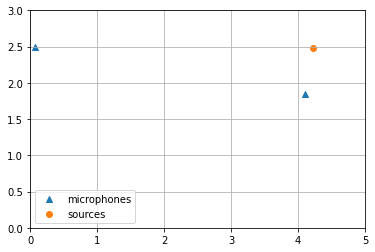

Error: 0.017352864146232605, delay: 1.883002265463728


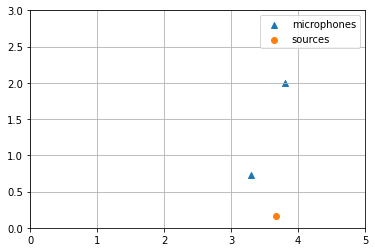

Error: 0.015217244625091553, delay: 7.016136583967075


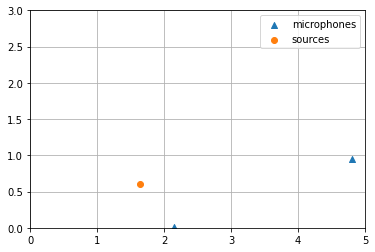

Error: 0.015191376209259033, delay: 4.254248260750824


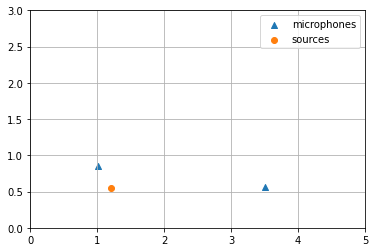

Error: 0.013651728630065918, delay: 0.5118312597287344


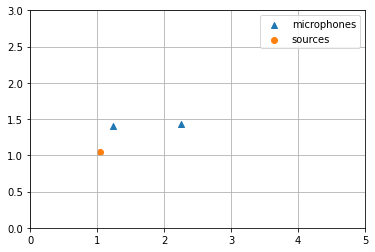

Error: 0.01270061731338501, delay: 4.617277161973565


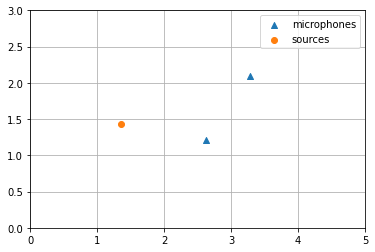

Error: 0.011543892323970795, delay: 2.33441817405319


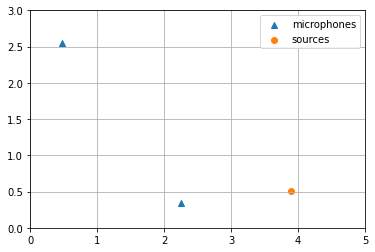

Error: 0.0023298263549804688, delay: 6.396218691890388


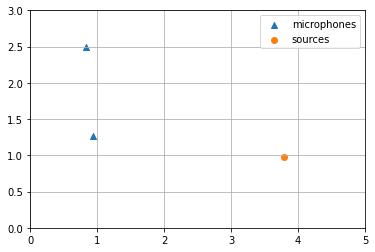

Error: 0.0007068514823913574, delay: 0.4826344972181962


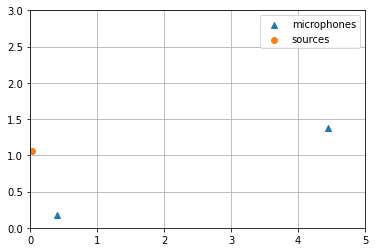

In [15]:
from scipy.stats import mode

errors = [d["error"] for d in output_dicts]
avg_error = np.mean(errors)
std_error = np.std(errors)
print(f"Error mean: {avg_error} Error std: {std_error}")

for d in output_dicts:
    delay_in_ms = eval(d['mic_delays'])[1]*1000
    print(f"Error: {d['error']}, delay_in_ms: {delay}")
    room_dims = eval(d["room_dims"])
    mics = eval(d["mic_coordinates"])
    sources = [eval(d["source_coordinates"])]
    plot_mics_and_sources(room_dims, mics, sources)
    plt.show()

In [13]:
output_dicts[0]

{'Unnamed: 0': 47,
 'room_dims': '[5, 3, 3]',
 'source_x': 1.7870264547858403,
 'source_y': 0.5332808565651059,
 'source_coordinates': '[1.7870264547858405, 0.5332808565651059, 1]',
 'mic_coordinates': '[[4.067833729755826, 2.0872829407731426, 1], [4.188029410223038, 2.1107142215484447, 1]]',
 'mic_delays': '[0, 0.0003942816469581312]',
 'mic_sampling_rates': '[16000, 16.0]',
 'tdoa': -0.0003292442654901,
 'normalized_tdoa': 0.038900932455148,
 'sr': 16000,
 'gain': 0.3192923693027881,
 'trim_beginning': True,
 'signals_dir': 'validation_dataset\\samples\\47',
 'x': tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.0956, -0.0840, -0.4697],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.3320,  0.2978, -0.0421]]),
 'prediction': 0.6098136901855469,
 'gt': tensor([0.0389]),
 'error': 0.5709127560257912}